<a href="https://colab.research.google.com/github/alexsimas07/Analisededados/blob/main/pre_processamento_E_commerce_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='red'>Data Science Academy</font>
# <font color='blue'>Big Data Real-Time Analytics com Python e Spark</font>

## <font color='blue'>Estudo de Caso 5</font>

## <font color='black'>Pré-Processamento de Dados Para E-Commerce Analytics</font>

Obs: Estaremos trabalhando em um grande projeto de Ciência de Dados distribuído em 3 capítulos:

- Análise Exploratória de Dados
    - EDA Parte 1
    - EDA Parte 2
- Engenharia de Atributos
- **Pré-Processamento de Dados**

O objetivo do Pré-processamento é deixar os dados no formato ideal para a próxima etapa dentro de um projeto de Ciência de Dados. Normalmente o Pré-processamento é a última etapa antes de treinar um modelo de Machine Learning.

Algumas técnicas de Pré-processamento devem ser aplicadas exclusivamente nos dados de treino (isso será explicado durante as aulas). Como não faremos Machine Learning neste Estudo de Caso, aplicaremos todas as técnicas estudadas em todo o conjunto de dados. Nosso foco será estudar as técnicas.

In [ ]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python usada neste Colab Notebook: ', python_version())

Versão da Linguagem Python usada neste Colab Notebook:  3.7.13


In [ ]:
# Instalando o pacote watermark 
!pip install -q -U watermark

In [ ]:
# Imports
import sklearn
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

In [ ]:
# Versão dos pacotes usados neste Colaby
%reload_ext watermark
%watermark -a 'Analista - Alexsander Maia Simas' --iversions

Author: Analista - Alexsander Maia Simas

pandas : 1.3.5
sklearn: 1.0.2
numpy  : 1.21.6



## Carregando o Dataset (Gerado ao Final do Estudo de Caso 4)
### último scrip chamado (Estudo caso 4 - Engenharia de atributos)

In [ ]:
# Carregando os dados
df = pd.read_csv('df_eng.csv', index_col = 0)

In [ ]:
df.shape

(10643, 16)

In [ ]:
df.head()

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo,performance_prioridade_envio,performance_modo_envio,faixa_desconto,performance_faixa_desconto
0,1,D,Aviao,4,2,177,3,baixa,F,44,1233,1,Não Houve Atraso,Não Houve Atraso,Desconto Acima da Media,Entrega no Prazo com Desconto Acima da Media
1,2,F,Aviao,4,5,216,2,baixa,M,59,3088,1,Não Houve Atraso,Não Houve Atraso,Desconto Acima da Media,Entrega no Prazo com Desconto Acima da Media
2,3,A,Aviao,2,2,183,4,baixa,M,48,3374,1,Não Houve Atraso,Não Houve Atraso,Desconto Acima da Media,Entrega no Prazo com Desconto Acima da Media
3,4,B,Aviao,3,3,176,4,media,M,10,1177,1,Não Houve Atraso,Não Houve Atraso,Desconto Abaixo da Media,Entrega no Prazo com Desconto Abaixo da Media
4,5,C,Aviao,2,2,184,3,media,F,46,2484,1,Não Houve Atraso,Não Houve Atraso,Desconto Acima da Media,Entrega no Prazo com Desconto Acima da Media


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10643 entries, 0 to 10999
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   ID                            10643 non-null  int64 
 1   corredor_armazem              10643 non-null  object
 2   modo_envio                    10643 non-null  object
 3   numero_chamadas_cliente       10643 non-null  int64 
 4   avaliacao_cliente             10643 non-null  int64 
 5   custo_produto                 10643 non-null  int64 
 6   compras_anteriores            10643 non-null  int64 
 7   prioridade_produto            10643 non-null  object
 8   genero                        10643 non-null  object
 9   desconto                      10643 non-null  int64 
 10  peso_gramas                   10643 non-null  int64 
 11  entregue_no_prazo             10643 non-null  int64 
 12  performance_prioridade_envio  10643 non-null  object
 13  performance_modo

In [ ]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo', 'performance_prioridade_envio',
       'performance_modo_envio', 'faixa_desconto',
       'performance_faixa_desconto'],
      dtype='object')

## Label Encoding

Leia o manual em pdf no Capítulo 6 com a definição de Label Encoding.

# Método 1

In [ ]:
# Variável categórica ordinal
df.prioridade_produto.value_counts()

baixa    5174
media    4587
alta      882
Name: prioridade_produto, dtype: int64

In [ ]:
# Dicionário de mapeamento
dic_prioridade_produto = {'baixa' : 1, 'media' : 2, 'alta' : 0}

In [ ]:
df['prioridade_produto'] = df['prioridade_produto'].map(dic_prioridade_produto)

In [ ]:
df.prioridade_produto.value_counts()

1    5174
2    4587
0     882
Name: prioridade_produto, dtype: int64

In [ ]:
df.head(10)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo,performance_prioridade_envio,performance_modo_envio,faixa_desconto,performance_faixa_desconto
0,1,D,Aviao,4,2,177,3,1,F,44,1233,1,Não Houve Atraso,Não Houve Atraso,Desconto Acima da Media,Entrega no Prazo com Desconto Acima da Media
1,2,F,Aviao,4,5,216,2,1,M,59,3088,1,Não Houve Atraso,Não Houve Atraso,Desconto Acima da Media,Entrega no Prazo com Desconto Acima da Media
2,3,A,Aviao,2,2,183,4,1,M,48,3374,1,Não Houve Atraso,Não Houve Atraso,Desconto Acima da Media,Entrega no Prazo com Desconto Acima da Media
3,4,B,Aviao,3,3,176,4,2,M,10,1177,1,Não Houve Atraso,Não Houve Atraso,Desconto Abaixo da Media,Entrega no Prazo com Desconto Abaixo da Media
4,5,C,Aviao,2,2,184,3,2,F,46,2484,1,Não Houve Atraso,Não Houve Atraso,Desconto Acima da Media,Entrega no Prazo com Desconto Acima da Media
5,6,F,Aviao,3,1,162,3,2,F,12,1417,1,Não Houve Atraso,Não Houve Atraso,Desconto Acima da Media,Entrega no Prazo com Desconto Acima da Media
6,7,D,Aviao,3,4,250,3,1,F,3,2371,1,Não Houve Atraso,Não Houve Atraso,Desconto Abaixo da Media,Entrega no Prazo com Desconto Abaixo da Media
7,8,F,Aviao,4,1,233,2,1,F,48,2804,1,Não Houve Atraso,Não Houve Atraso,Desconto Acima da Media,Entrega no Prazo com Desconto Acima da Media
8,9,A,Aviao,3,4,150,3,1,F,11,1861,1,Não Houve Atraso,Não Houve Atraso,Desconto Abaixo da Media,Entrega no Prazo com Desconto Abaixo da Media
9,10,B,Aviao,3,2,164,3,2,F,29,1187,1,Não Houve Atraso,Não Houve Atraso,Desconto Acima da Media,Entrega no Prazo com Desconto Acima da Media


In [ ]:
# Variável categórica ordinal (passível de interpretação)
df.modo_envio.value_counts()

Navio       7212
Aviao       1728
Caminhao    1703
Name: modo_envio, dtype: int64

In [ ]:
# Dicionário de mapeamento
dic_modo_envio= {'Navio': 0, 'Aviao': 1, 'Caminhao':2}
df['modo_envio'] = df['modo_envio'].map(dic_modo_envio)

In [ ]:
df.modo_envio.value_counts()

0    7212
1    1728
2    1703
Name: modo_envio, dtype: int64

In [ ]:
df.head()

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo,performance_prioridade_envio,performance_modo_envio,faixa_desconto,performance_faixa_desconto
0,1,D,1,4,2,177,3,1,F,44,1233,1,Não Houve Atraso,Não Houve Atraso,Desconto Acima da Media,Entrega no Prazo com Desconto Acima da Media
1,2,F,1,4,5,216,2,1,M,59,3088,1,Não Houve Atraso,Não Houve Atraso,Desconto Acima da Media,Entrega no Prazo com Desconto Acima da Media
2,3,A,1,2,2,183,4,1,M,48,3374,1,Não Houve Atraso,Não Houve Atraso,Desconto Acima da Media,Entrega no Prazo com Desconto Acima da Media
3,4,B,1,3,3,176,4,2,M,10,1177,1,Não Houve Atraso,Não Houve Atraso,Desconto Abaixo da Media,Entrega no Prazo com Desconto Abaixo da Media
4,5,C,1,2,2,184,3,2,F,46,2484,1,Não Houve Atraso,Não Houve Atraso,Desconto Acima da Media,Entrega no Prazo com Desconto Acima da Media


### Método 2

In [ ]:
# Variável categórica nominal
df.genero.value_counts()

F    5357
M    5286
Name: genero, dtype: int64

In [ ]:
# Cria o objeto encoder
le = LabelEncoder()

In [ ]:
# Treina o objeto (normalmente fazemos isso somente com dados de treino)
le.fit(df.genero)

LabelEncoder()

In [ ]:
list(le.classes_)

['F', 'M']

In [ ]:
# Aplicando o objeto encoder treinado
# (fazemos iisso em dados de treino e teste e também em novos dados usados no modelo)
df.genero = le.transform(df.genero)

In [ ]:
df.genero.value_counts()

0    5357
1    5286
Name: genero, dtype: int64

### One-Hot Encoding
Leia o manual em PDF no Capítulo 6 com a definição de One-Hot Encoding.

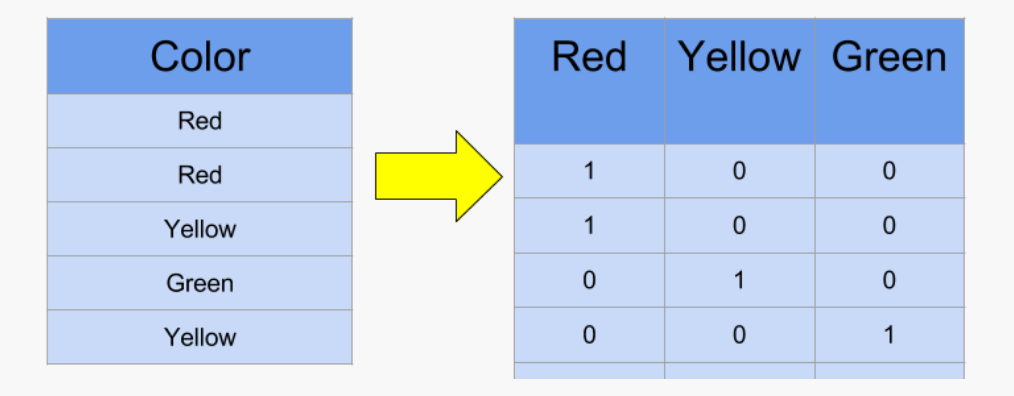

In [ ]:
df.head()

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo,performance_prioridade_envio,performance_modo_envio,faixa_desconto,performance_faixa_desconto
0,1,D,1,4,2,177,3,1,0,44,1233,1,Não Houve Atraso,Não Houve Atraso,Desconto Acima da Media,Entrega no Prazo com Desconto Acima da Media
1,2,F,1,4,5,216,2,1,1,59,3088,1,Não Houve Atraso,Não Houve Atraso,Desconto Acima da Media,Entrega no Prazo com Desconto Acima da Media
2,3,A,1,2,2,183,4,1,1,48,3374,1,Não Houve Atraso,Não Houve Atraso,Desconto Acima da Media,Entrega no Prazo com Desconto Acima da Media
3,4,B,1,3,3,176,4,2,1,10,1177,1,Não Houve Atraso,Não Houve Atraso,Desconto Abaixo da Media,Entrega no Prazo com Desconto Abaixo da Media
4,5,C,1,2,2,184,3,2,0,46,2484,1,Não Houve Atraso,Não Houve Atraso,Desconto Acima da Media,Entrega no Prazo com Desconto Acima da Media


In [ ]:
# Variável categórica nominal
df.corredor_armazem.value_counts()

F    3539
B    1778
D    1777
A    1777
C    1772
Name: corredor_armazem, dtype: int64

In [ ]:
# Variável categórica nominal
df.performance_modo_envio.value_counts()

Não Houve Atraso                               6282
Atraso Tolerável na Entrega Por Navio          1453
Atraso Problemático na Entrega Por Navio       1307
Atraso Tolerável na Entrega Por Caminhao        350
Atraso Tolerável na Entrega Por Aviao           331
Atraso Problemático na Entrega Por Caminhao     310
Atraso Problemático na Entrega Por Aviao        300
Atraso Crítico na Entrega Por Navio             194
Atraso Crítico na Entrega Por Aviao              65
Atraso Crítico na Entrega Por Caminhao           51
Name: performance_modo_envio, dtype: int64

In [ ]:
# Variável categórica nominal
df.faixa_desconto.value_counts()

Desconto Abaixo da Media    8269
Desconto Acima da Media     2374
Name: faixa_desconto, dtype: int64

In [ ]:
# Variável categórica nominal
df.performance_faixa_desconto.value_counts()

Atraso na Entrega com Desconto Abaixo da Media    4361
Entrega no Prazo com Desconto Abaixo da Media     3908
Entrega no Prazo com Desconto Acima da Media      2374
Name: performance_faixa_desconto, dtype: int64

In [ ]:
# Aplicando o One-Hot Encoding 
for cat in ['corredor_armazem',
            'faixa_desconto',
            'performance_modo_envio',
            'performance_prioridade_envio',
            'performance_faixa_desconto']:
            onehots = pd.get_dummies(df[cat], prefix = cat)
            df = df.join(onehots)

In [ ]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo', 'performance_prioridade_envio',
       'performance_modo_envio', 'faixa_desconto',
       'performance_faixa_desconto', 'corredor_armazem_A',
       'corredor_armazem_B', 'corredor_armazem_C', 'corredor_armazem_D',
       'corredor_armazem_F', 'faixa_desconto_Desconto Abaixo da Media',
       'faixa_desconto_Desconto Acima da Media',
       'performance_modo_envio_Atraso Crítico na Entrega Por Aviao',
       'performance_modo_envio_Atraso Crítico na Entrega Por Caminhao',
       'performance_modo_envio_Atraso Crítico na Entrega Por Navio',
       'performance_modo_envio_Atraso Problemático na Entrega Por Aviao',
       'performance_modo_envio_Atraso Problemático na Entrega Por Caminhao',
       'performance_modo_envio_Atraso Problemático na Entrega Por Na

In [ ]:
df.head()

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,...,performance_modo_envio_Atraso Tolerável na Entrega Por Caminhao,performance_modo_envio_Atraso Tolerável na Entrega Por Navio,performance_modo_envio_Não Houve Atraso,performance_prioridade_envio_Atraso Crítico,performance_prioridade_envio_Atraso Problemático,performance_prioridade_envio_Atraso Tolerável,performance_prioridade_envio_Não Houve Atraso,performance_faixa_desconto_Atraso na Entrega com Desconto Abaixo da Media,performance_faixa_desconto_Entrega no Prazo com Desconto Abaixo da Media,performance_faixa_desconto_Entrega no Prazo com Desconto Acima da Media
0,1,D,1,4,2,177,3,1,0,44,...,0,0,1,0,0,0,1,0,0,1
1,2,F,1,4,5,216,2,1,1,59,...,0,0,1,0,0,0,1,0,0,1
2,3,A,1,2,2,183,4,1,1,48,...,0,0,1,0,0,0,1,0,0,1
3,4,B,1,3,3,176,4,2,1,10,...,0,0,1,0,0,0,1,0,1,0
4,5,C,1,2,2,184,3,2,0,46,...,0,0,1,0,0,0,1,0,0,1


In [ ]:
# Não precisaremos mais das colunas originais após aplicar One-Hot Encoding
df = df.drop(columns = ['corredor_armazem', 
                        'performance_prioridade_envio', 
                        'performance_modo_envio', 
                        'faixa_desconto', 
                        'performance_faixa_desconto'])

In [ ]:
# Podemos remover a coluna ID
df = df.drop(columns = ['ID'])

In [ ]:
df.head()

,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo,...,performance_modo_envio_Atraso Tolerável na Entrega Por Caminhao,performance_modo_envio_Atraso Tolerável na Entrega Por Navio,performance_modo_envio_Não Houve Atraso,performance_prioridade_envio_Atraso Crítico,performance_prioridade_envio_Atraso Problemático,performance_prioridade_envio_Atraso Tolerável,performance_prioridade_envio_Não Houve Atraso,performance_faixa_desconto_Atraso na Entrega com Desconto Abaixo da Media,performance_faixa_desconto_Entrega no Prazo com Desconto Abaixo da Media,performance_faixa_desconto_Entrega no Prazo com Desconto Acima da Media
0,1,4,2,177,3,1,0,44,1233,1,...,0,0,1,0,0,0,1,0,0,1
1,1,4,5,216,2,1,1,59,3088,1,...,0,0,1,0,0,0,1,0,0,1
2,1,2,2,183,4,1,1,48,3374,1,...,0,0,1,0,0,0,1,0,0,1
3,1,3,3,176,4,2,1,10,1177,1,...,0,0,1,0,0,0,1,0,1,0
4,1,2,2,184,3,2,0,46,2484,1,...,0,0,1,0,0,0,1,0,0,1


In [ ]:
df.shape

(10643, 34)

## Fature Scaling

Leia os manuais em pdf no Capítulo 6. Abaixo um resumo:

- O dimensionamento de recursos (Fature Scaling) consiste em transformar o valor dos recursos em uma faixa semelhante, para que os algoritmos de aprendizado de máquina se comportem melhor, resultando em modelos ideais.

- Padronização e normalização são duas técnicas mais comuns para dimensionamento de recursos.

- A normalização é transformar os valores dos recursos para que caiam dentro dos intervalos limitados (min e max).

- A padronização é transformar os valores de recursos para cair em torno da média como 0 com desvio padrão como 1.

- A padronização mantém informações úteis sobre valores discrepantes e torna o algoritmo menos sensível a eles em contraste com o dimensionamento mínimo-máximo.

- A classe MinMaxScaler() de sklearn.preprocessing é usada para normalização de recursos.

- A classe StandardScaler() de sklearn.preprocessing é usada para padronização de recursos.

In [ ]:
df.head()

,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo,...,performance_modo_envio_Atraso Tolerável na Entrega Por Caminhao,performance_modo_envio_Atraso Tolerável na Entrega Por Navio,performance_modo_envio_Não Houve Atraso,performance_prioridade_envio_Atraso Crítico,performance_prioridade_envio_Atraso Problemático,performance_prioridade_envio_Atraso Tolerável,performance_prioridade_envio_Não Houve Atraso,performance_faixa_desconto_Atraso na Entrega com Desconto Abaixo da Media,performance_faixa_desconto_Entrega no Prazo com Desconto Abaixo da Media,performance_faixa_desconto_Entrega no Prazo com Desconto Acima da Media
0,1,4,2,177,3,1,0,44,1233,1,...,0,0,1,0,0,0,1,0,0,1
1,1,4,5,216,2,1,1,59,3088,1,...,0,0,1,0,0,0,1,0,0,1
2,1,2,2,183,4,1,1,48,3374,1,...,0,0,1,0,0,0,1,0,0,1
3,1,3,3,176,4,2,1,10,1177,1,...,0,0,1,0,0,0,1,0,1,0
4,1,2,2,184,3,2,0,46,2484,1,...,0,0,1,0,0,0,1,0,0,1


In [ ]:
df.columns

Index(['modo_envio', 'numero_chamadas_cliente', 'avaliacao_cliente',
       'custo_produto', 'compras_anteriores', 'prioridade_produto', 'genero',
       'desconto', 'peso_gramas', 'entregue_no_prazo', 'corredor_armazem_A',
       'corredor_armazem_B', 'corredor_armazem_C', 'corredor_armazem_D',
       'corredor_armazem_F', 'faixa_desconto_Desconto Abaixo da Media',
       'faixa_desconto_Desconto Acima da Media',
       'performance_modo_envio_Atraso Crítico na Entrega Por Aviao',
       'performance_modo_envio_Atraso Crítico na Entrega Por Caminhao',
       'performance_modo_envio_Atraso Crítico na Entrega Por Navio',
       'performance_modo_envio_Atraso Problemático na Entrega Por Aviao',
       'performance_modo_envio_Atraso Problemático na Entrega Por Caminhao',
       'performance_modo_envio_Atraso Problemático na Entrega Por Navio',
       'performance_modo_envio_Atraso Tolerável na Entrega Por Aviao',
       'performance_modo_envio_Atraso Tolerável na Entrega Por Caminhao',
  

**ATENÇÃO**: No caso de normalizar o conjunto de dados de treinamento e teste, o estimador MinMaxScaler() terá o fit() no conjunto de dados de treinamento e o mesmo estimador será usado para transformar o conjunto de dados de treinamento e teste. O mesmo estimador também deve ser usado em novos dados ao fazer previsões com o modelo.

In [ ]:
df.peso_gramas.sample(5)

7574     4843
10688    4461
1578     1082
9308     5778
8497     4877
Name: peso_gramas, dtype: int64

In [ ]:
df['peso_gramas'] = MinMaxScaler().fit_transform(df['peso_gramas'].values.reshape(len(df), 1))

In [ ]:
df.peso_gramas.sample(5)

6489    0.001899
6039    0.080935
9840    0.720818
8972    0.632140
4494    0.631702
Name: peso_gramas, dtype: float64

In [ ]:
df.custo_produto.sample(5)

8413    257
5128    271
9427    266
896     162
5504    282
Name: custo_produto, dtype: int64

In [ ]:
df['custo_produto'] = MinMaxScaler().fit_transform(df['custo_produto'].values.reshape(len(df), 1))

In [ ]:
df.custo_produto.sample(10)

2562     0.443925
635      0.794393
10475    0.757009
73       0.556075
10910    0.785047
8902     0.808411
1710     0.612150
3731     0.490654
588      0.490654
1635     0.850467
Name: custo_produto, dtype: float64

**ATENÇÃO**: No caso de padronizar o conjunto de dados de treinamento e teste, o estimador StandardScaler() terá o fit() no conjunto de dados de treinamento e o mesmo estimador será usado para transformar o conjunto de dados de treinamento e teste. O mesmo estimador também deve ser usado em novos dados ao fazer previsões com o modelo.

In [ ]:
df['desconto'] = StandardScaler().fit_transform(df['desconto'].values.reshape(len(df), 1))

In [ ]:
df.desconto.sample(10)

6506    -0.435457
7494    -0.635573
8795    -0.502162
10226   -0.768984
9275    -0.435457
8179    -0.702279
3307    -0.302046
7566    -0.235340
9802    -0.635573
4131    -0.702279
Name: desconto, dtype: float64

In [ ]:
df['numero_chamadas_cliente'] = StandardScaler().fit_transform(df['numero_chamadas_cliente'].values.reshape(len(df), 
                                                                                                            1))

In [ ]:
df.numero_chamadas_cliente.sample(10)

7157     2.562190
103      0.815832
570     -1.803706
422     -0.930527
4997    -1.803706
8409    -0.057348
8019     2.562190
10359   -0.057348
6287     0.815832
1607    -0.930527
Name: numero_chamadas_cliente, dtype: float64

In [ ]:
df['avaliacao_cliente'] = StandardScaler().fit_transform(df['avaliacao_cliente'].values.reshape(len(df), 1))

In [ ]:
df.avaliacao_cliente.sample(10)

3679    0.007718
8123    1.423904
5738    0.007718
5417   -0.700376
5083    0.715811
7635    0.715811
5475   -0.700376
6162   -0.700376
8549    1.423904
4857    1.423904
Name: avaliacao_cliente, dtype: float64

In [ ]:
df['compras_anteriores'] = StandardScaler().fit_transform(df['compras_anteriores'].values.reshape(len(df), 1))

In [ ]:
df.compras_anteriores.sample(10)

7705    0.416201
6332   -0.359702
9889    1.192105
5650   -1.135605
6218    0.416201
2609   -0.359702
4004   -0.359702
5025    0.416201
7731    1.192105
9189    1.192105
Name: compras_anteriores, dtype: float64

In [ ]:
df.head()

,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo,...,performance_modo_envio_Atraso Tolerável na Entrega Por Caminhao,performance_modo_envio_Atraso Tolerável na Entrega Por Navio,performance_modo_envio_Não Houve Atraso,performance_prioridade_envio_Atraso Crítico,performance_prioridade_envio_Atraso Problemático,performance_prioridade_envio_Atraso Tolerável,performance_prioridade_envio_Não Houve Atraso,performance_faixa_desconto_Atraso na Entrega com Desconto Abaixo da Media,performance_faixa_desconto_Entrega no Prazo com Desconto Abaixo da Media,performance_faixa_desconto_Entrega no Prazo com Desconto Acima da Media
0,1,-0.057348,-0.700376,0.378505,-0.359702,1,0,2.099353,0.033893,1,...,0,0,1,0,0,0,1,0,0,1
1,1,-0.057348,1.423904,0.560748,-1.135605,1,1,3.099936,0.304894,1,...,0,0,1,0,0,0,1,0,0,1
2,1,-1.803706,-0.700376,0.406542,0.416201,1,1,2.366175,0.346676,1,...,0,0,1,0,0,0,1,0,0,1
3,1,-0.930527,0.007718,0.373832,0.416201,2,1,-0.168635,0.025712,1,...,0,0,1,0,0,0,1,0,1,0
4,1,-1.803706,-0.700376,0.411215,-0.359702,2,0,2.232764,0.216654,1,...,0,0,1,0,0,0,1,0,0,1


In [ ]:
df.to_csv('dataset_final.csv', sep = ',', encoding = 'utf-8')